Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


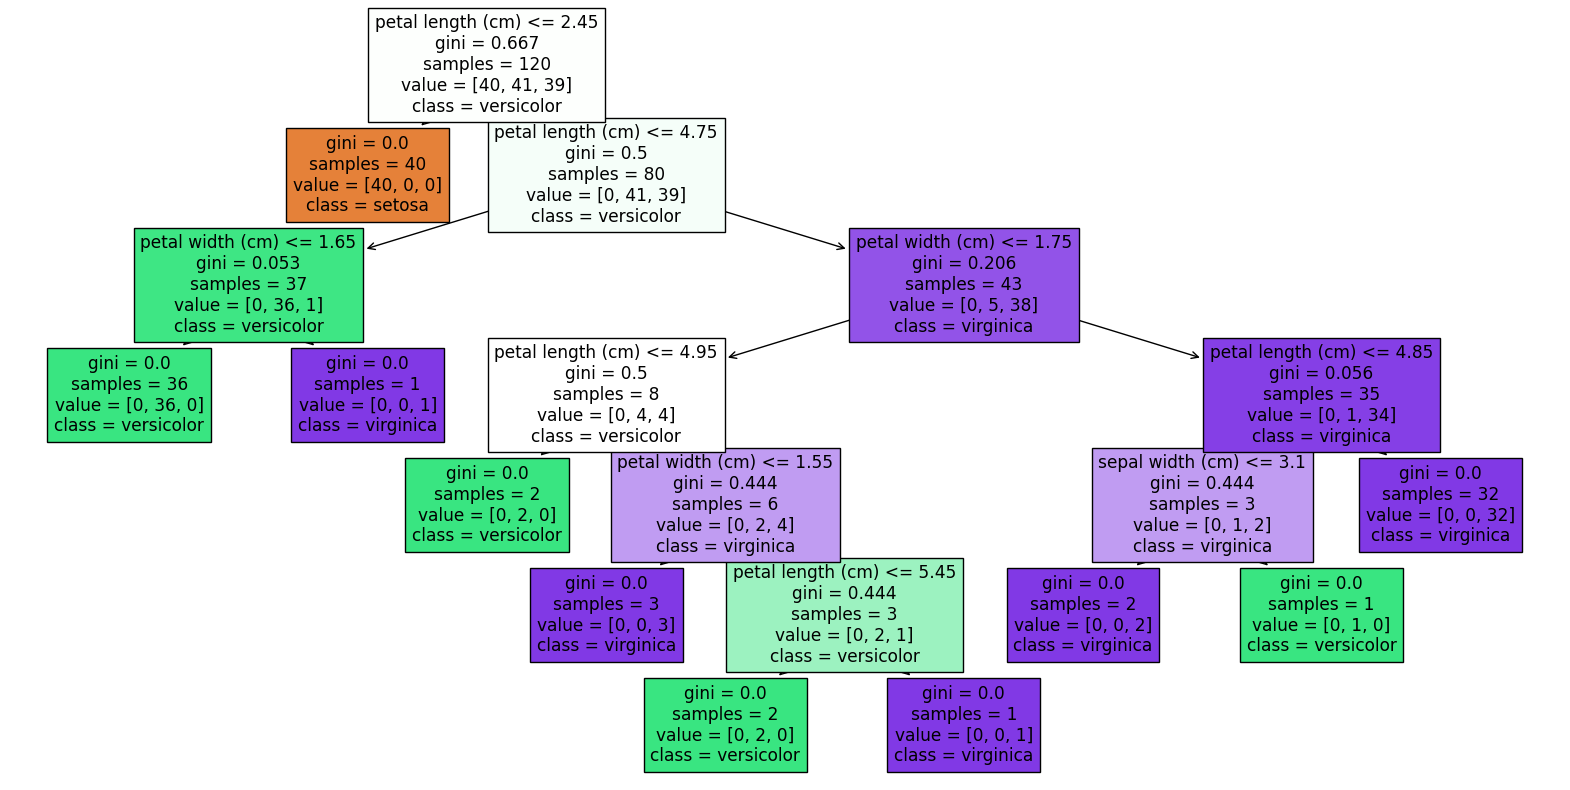

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_wine

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

tree_rules = export_text(clf, feature_names=data.feature_names)
print(tree_rules)


Exercise-1


=== Breast Cancer Dataset ===
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


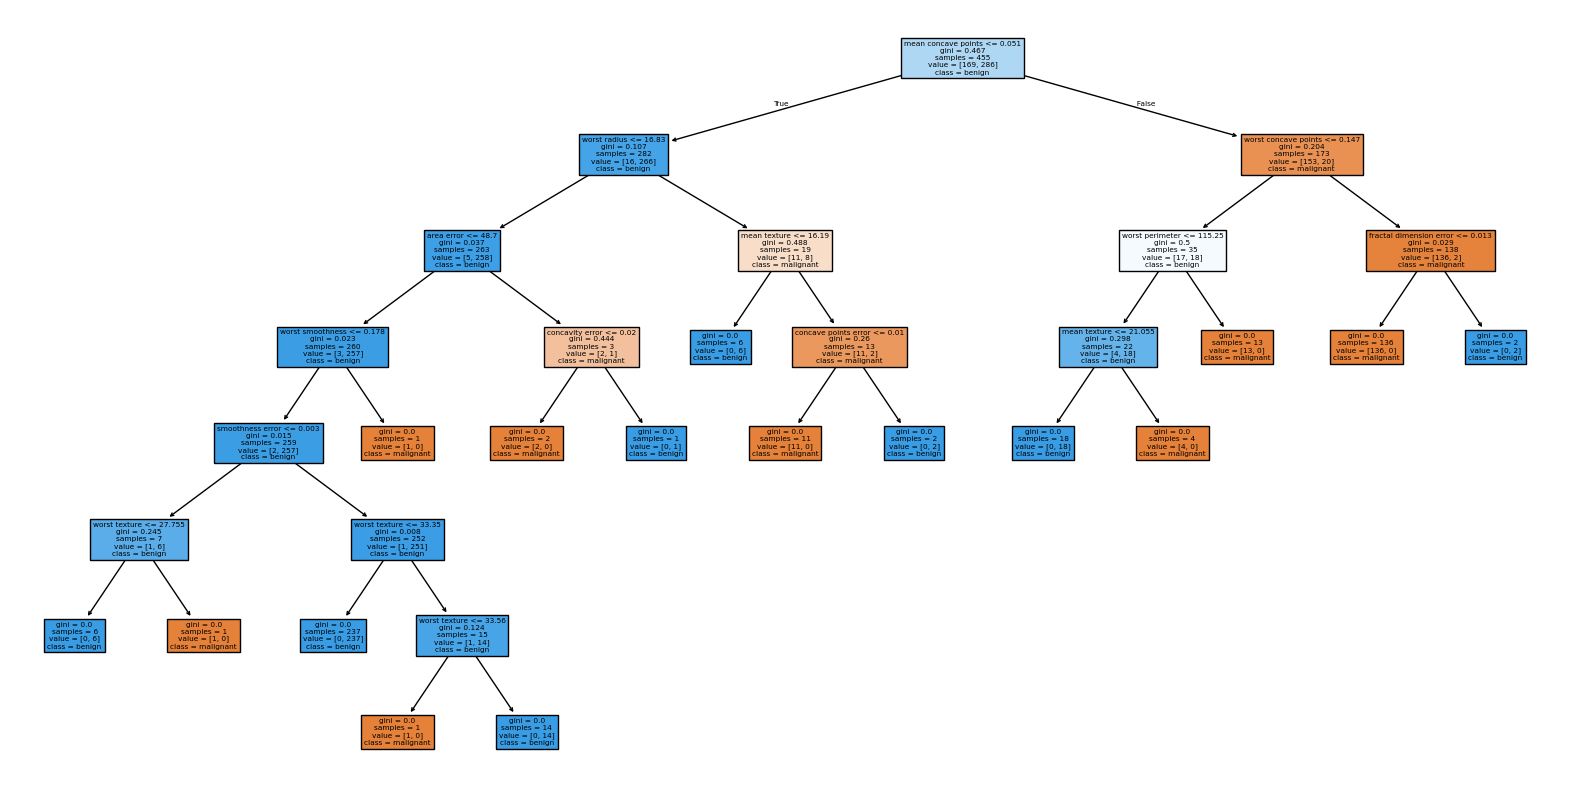

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- worst texture <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- worst texture <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.35
|   |   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- concavity error <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- concavity error >  0.02
|   |   |   |   |--- class: 1
|   |--- worst radius >  16.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Model
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluation
print("=== Breast Cancer Dataset ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Print Tree Rules
tree_rules = export_text(clf, feature_names=data.feature_names)
print(tree_rules)


Exercise-2


=== Wine Dataset ===
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


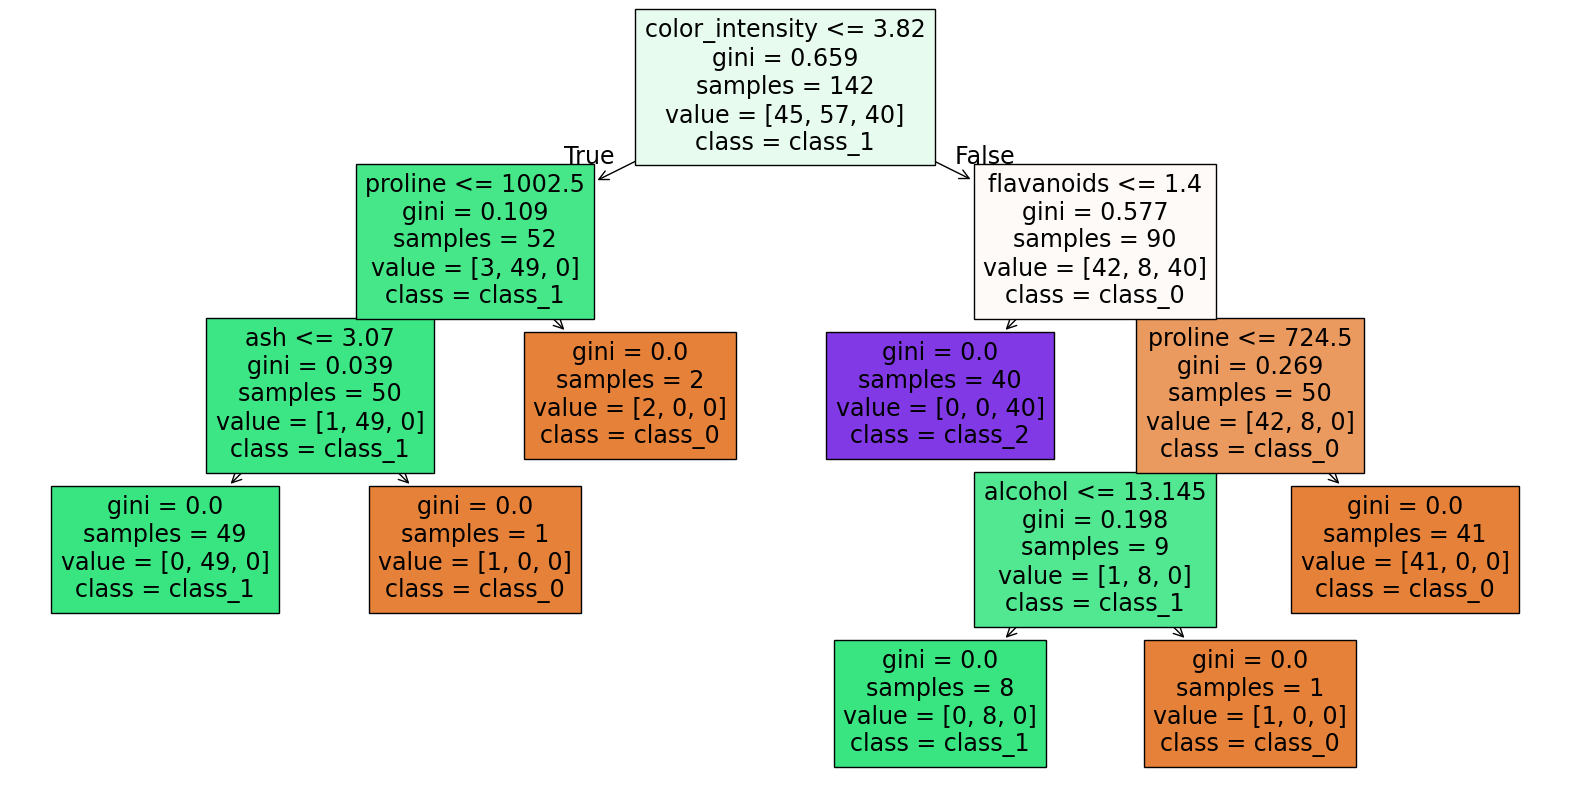

|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0



In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load Wine Dataset
data = load_wine()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Model
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluation
print("=== Wine Dataset ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Print Tree Rules
tree_rules = export_text(clf, feature_names=data.feature_names)
print(tree_rules)
